In [30]:
import sys
sys.path.append('../data')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
from lifelines import CoxPHFitter

In [26]:
## load data
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [28]:
# clean data
## convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],
                                   errors = 'coerce'
                                  )

## replace Churn yes/no with 1/0
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## impute missing TotalCharges
df['TotalCharges'].fillna(value=df['TotalCharges'].median(),
                         inplace=True
                         )

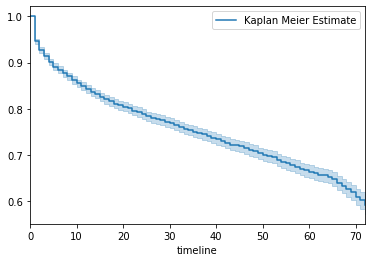

In [29]:
# KaplanMeir curve

durations = df['tenure']
event_observed = df['Churn']

km = KaplanMeierFitter()

km.fit(durations, event_observed, label='Kaplan Meier Estimate')

km.plot()

## Cox Proportional Hazard Model (Survival Regression)

In [32]:
df_r= df.loc[:,['tenure','Churn','gender',
                'Partner','Dependents',
                'PhoneService','MonthlyCharges',
                'SeniorCitizen','StreamingTV'
               ]]

df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [33]:
df_r_dummy = pd.get_dummies(df_r, drop_first=True)
df_r_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [34]:
cph = CoxPHFitter()
cph.fit(df_r_dummy, 'tenure', event_col='Churn')
cph.print_summary()

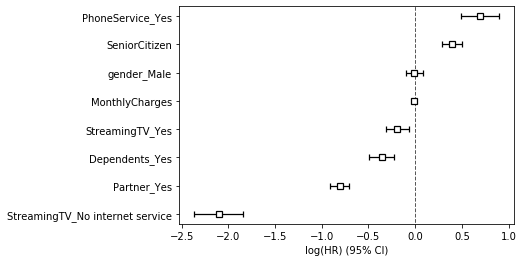

In [35]:
cph.plot()